In [1]:
import urllib.request as req
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

from bs4 import BeautifulSoup

from pandas import DataFrame, Series
import pandas as pd

import re

import matplotlib.pylab as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\windows/fonts/malgun.ttf").get_name() # 한글 깨짐 방지
rc('font', family = font_name)

from wordcloud import WordCloud, STOPWORDS
import imageio

In [2]:
browser = webdriver.Chrome('C:/chromedriver_80.exe')

In [3]:
browser.get('https://tv.naver.com/sbs.hyena/clips')

In [4]:
i = 1
for i in range(1,5):
    browser.find_element_by_xpath('//*[@id="cds_flick"]/div/div[3]/div/div/div/div[2]/div[3]/a').click()
    i += 1
    time.sleep(3)
    
soup =  BeautifulSoup(browser.page_source, "html.parser")
div = soup.find('div', class_="cds_area")
video_list = div.findAll('div', class_="cds _MM_CARD ")

In [5]:
video_list

[<div class="cds _MM_CARD ">
 <div class="cds_type">
 <a class="cds_thm" href="/v/13157822" onclick="clickcr(this, 'chv.cthm', '', '', '');">
 <img alt="[스페셜] 구멍 없는 연기 맛집! 하이에나 엔딩모음★" data-aflag="false" onerror='this.src="https://phinf.pstatic.net/tvcast/20161227_263/photoinfra_1482831787654EeESz_PNG/default_clip.png?type=f194_109_webp"' src="https://phinf.pstatic.net/tvcast/20200401_258/Yk84s_15857374589453PUmQ_JPEG/c0c96cf5-8856-499a-ac06-88c5c6249691.jpg?type=f194_109_blend_webp" width="100%"/>
 <!-- [D]담았을때 class="tk_b check" -->
 <span class="tm_b">19:51</span>
 <span class="btn_my _click" data-clipno="13157822" data-event="addWatchLater" data-login="false" onclick="clickcr(this, 'chv.add', '', '', '');">나중에 보기</span>
 </a>
 <dl class="cds_info">
 <dt class="title">
 <a href="/v/13157822" onclick="clickcr(this, 'chv.ctitle', '', '', '');"><tooltip>[스페셜] 구멍 없는 연기 맛집! 하이에나 엔딩모음★</tooltip></a>
 </dt>
 <dd class="meta">
 <span class="hit"><span class="blind">재생 수</span>4,034</span>
 <

In [6]:
video_info = DataFrame(columns = ['title', 'run_time', 'play', 'like', 'run_time_min'])
for i in video_list:
    title = i.find('dt', class_='title').text.strip()
    run_time = i.find('span', class_='tm_b').text
    play = i.find('span', class_='hit').text
    like = i.find('span', class_='like').text
    video_info = video_info.append({'title': title, 'run_time': run_time, 'play': play, 'like': like}, ignore_index = True)

In [7]:
video_info

,title,run_time,play,like,run_time_min
0,[스페셜] 구멍 없는 연기 맛집! 하이에나 엔딩모음★,19:51,"재생 수4,034",좋아요 수225,NaN
1,"[메이킹] 김혜수X주지훈, 위로 싸-악♥ 눈빛이 곧 만병통치약! #5초만에_사르르",5:00,"재생 수6,714",좋아요 수250,NaN
2,"[직진 엔딩] “그저 당신이라 사랑해” 주지훈, 김혜수에 애틋 고백♥",3:57,"재생 수141,741","좋아요 수1,990",NaN
3,[4월 3일 예고] 끝이 아니라 시작이야!,0:33,"재생 수123,612",좋아요 수737,NaN
4,"‘직진남’ 김재철, ‘대쪽녀’ 김혜수에 밑도 끝도 없는 대시!",3:13,"재생 수81,111",좋아요 수447,NaN
...,...,...,...,...,...
145,"[복수 시작] 주지훈, 김혜수 도발하며 반격 시작!",3:33,"재생 수121,243",좋아요 수546,NaN
146,"[3회 예고] 김혜수 VS 주지훈, 숨 막히는 쇼 타임의 시작?!",0:35,"재생 수75,282",좋아요 수241,NaN
147,"“저와 함께 하시죠” 주지훈, 김영아에 파격 제안!",3:08,"재생 수38,938",좋아요 수147,NaN
148,"이주연, 김혜수에 지현준 만행 폭로!",2:50,"재생 수54,560",좋아요 수181,NaN


In [8]:
title_text = ''
for i in range(len(video_info)):
    title_text += video_info['title'][i]
title_text

"[스페셜] 구멍 없는 연기 맛집! 하이에나 엔딩모음★[메이킹] 김혜수X주지훈, 위로 싸-악♥ 눈빛이 곧 만병통치약! #5초만에_사르르[직진 엔딩] “그저 당신이라 사랑해” 주지훈, 김혜수에 애틋 고백♥[4월 3일 예고] 끝이 아니라 시작이야!‘직진남’ 김재철, ‘대쪽녀’ 김혜수에 밑도 끝도 없는 대시!“치정에 얽힌 살인이지” 김혜수, 의뢰인 지현준 기사에 분노♨전석호×현봉식×정지환×박세진, 열 일하는 드림팀 케미★“눈 뜨고 죽었잖아요” 오경화, 이주연 살인사건에 분노♨“후회하실 겁니다” 김영아, 이도경·주지훈 배신에 분노♨“내가 정말 죽였을까..?” 지현준, 김혜수에 말하는 사건 당일!“이주연이 죽었어” 주지훈, 사건에 눈먼 김혜수에 일침!“그러니까 알아내” 지현준, 김혜수에 이주연 뒷조사 의뢰!“불쌍해서 어떡해요..” 김한수, 이주연 죽음에 오열김혜수, 냉정하게 찍는 지현준 사건 현장 증거사진!김혜수 VS 주지훈, 이주연 죽음 앞 '극과 극 태도'로 대립![3월 28일 예고] “이 사건은 내가 시작한 거야!”“참 맘에 안 드는데.. 맘에 들어” 주지훈, 김혜수와 투닥투닥[경악 엔딩] 김혜수×주지훈, 참혹한 사건 현장에 동공확장!♥달달♡ 김재철, 롤러코스터 같은 김혜수에 또다시 홀릭![질투] 주지훈, 강력한 라이벌 김재철에 슬슬 올라오는 짜증!“내가 개 같아?” 현타 온 주지훈, 김영재에 솔직한 질문‘이제 보니 완전 사냥개 스타일이네’ 주지훈, 의뢰인 말에 복잡한 심정“연인이긴 했구나” 주지훈, 김혜수에 로맨틱한 주정♡‘오늘은 여기까지!’ 당찬 김혜수, 사이비 교주 한방 먹이기![사이다] 김혜수, 사이비 집회에 뿌린 오윤홍 고소장!“썩은 거든 산 거든 뼈째 씹어 먹거든!” 김혜수, 야성미 걸크러쉬 발산↗새우등 터진 전석호, 분노 폭발한 주지훈 때문에 ‘핸드폰 박살!’“오지랖 떨지 말고 빠져!” 김혜수, 주지훈 향해 예민 폭발♨[메이킹] 김혜수X주지훈의 뜨거운(?) 케이블카 데이트! (ft.투리구슬 윤희재)[스페셜] 주지훈×전석호, 티키타카 ‘환상의 궁합’ 모

In [9]:
re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》♥♡★☆♨↗“”’＂＂]', '', title_text)

'스페셜 구멍 없는 연기 맛집 하이에나 엔딩모음메이킹 김혜수X주지훈 위로 싸악 눈빛이 곧 만병통치약 5초만에_사르르직진 엔딩 그저 당신이라 사랑해 주지훈 김혜수에 애틋 고백4월 3일 예고 끝이 아니라 시작이야직진남 김재철 대쪽녀 김혜수에 밑도 끝도 없는 대시치정에 얽힌 살인이지 김혜수 의뢰인 지현준 기사에 분노전석호×현봉식×정지환×박세진 열 일하는 드림팀 케미눈 뜨고 죽었잖아요 오경화 이주연 살인사건에 분노후회하실 겁니다 김영아 이도경·주지훈 배신에 분노내가 정말 죽였을까 지현준 김혜수에 말하는 사건 당일이주연이 죽었어 주지훈 사건에 눈먼 김혜수에 일침그러니까 알아내 지현준 김혜수에 이주연 뒷조사 의뢰불쌍해서 어떡해요 김한수 이주연 죽음에 오열김혜수 냉정하게 찍는 지현준 사건 현장 증거사진김혜수 VS 주지훈 이주연 죽음 앞 극과 극 태도로 대립3월 28일 예고 이 사건은 내가 시작한 거야참 맘에 안 드는데 맘에 들어 주지훈 김혜수와 투닥투닥경악 엔딩 김혜수×주지훈 참혹한 사건 현장에 동공확장달달 김재철 롤러코스터 같은 김혜수에 또다시 홀릭질투 주지훈 강력한 라이벌 김재철에 슬슬 올라오는 짜증내가 개 같아 현타 온 주지훈 김영재에 솔직한 질문이제 보니 완전 사냥개 스타일이네 주지훈 의뢰인 말에 복잡한 심정연인이긴 했구나 주지훈 김혜수에 로맨틱한 주정오늘은 여기까지 당찬 김혜수 사이비 교주 한방 먹이기사이다 김혜수 사이비 집회에 뿌린 오윤홍 고소장썩은 거든 산 거든 뼈째 씹어 먹거든 김혜수 야성미 걸크러쉬 발산새우등 터진 전석호 분노 폭발한 주지훈 때문에 핸드폰 박살오지랖 떨지 말고 빠져 김혜수 주지훈 향해 예민 폭발메이킹 김혜수X주지훈의 뜨거운 케이블카 데이트 ft투리구슬 윤희재스페셜 주지훈×전석호 티키타카 환상의 궁합 모음메이킹 귀여움이 지나친 김혜수 산낙지 먹방 X 낄끼빠빠 못하는 질투요정 주지훈3월 27일 예고 보여줄게 당신 엄마 내가 어떻게 씹어먹는지충격 엔딩 김혜수 자신의 과거 알고 있는 주지훈에 당황카리스마 내가 너처럼 미친X 인건 맞는데 김혜수 의뢰

In [10]:
from konlpy.tag import Okt
import nltk
okt = Okt()

In [11]:
keyword = okt.nouns(title_text) # extract nouns
kw_txt = nltk.Text(keyword) # make one string

In [12]:
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\windows/fonts/malgun.ttf").get_name() # 한글 깨짐 방지
rc('font', family = font_name)

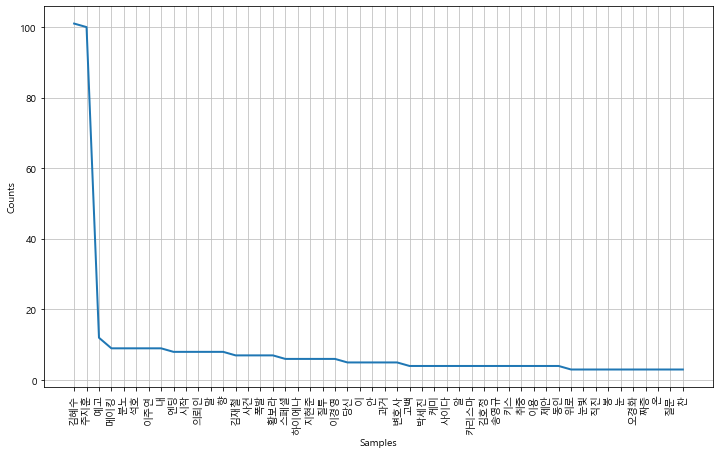

In [13]:
plt.figure(figsize = (12, 7))
kw_txt.plot(50)

In [14]:
from wordcloud import WordCloud
import imageio

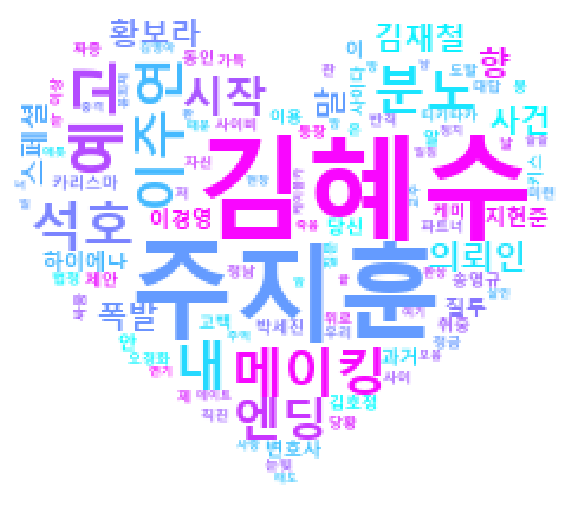

In [15]:
wc = WordCloud(font_path = 'C://windows//Fonts//malgunbd.ttf', 
               background_color = 'white', colormap = 'cool', mask = imageio.imread("C:/data/wc_icon/heart.png"),
               width = 1000, height = 800, max_words = 100, min_font_size = 3).generate_from_frequencies(kw_txt.vocab())
plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [16]:
video_info['run_time_min'] = 0

In [17]:
for i in range(len(video_info)):
    video_info.loc[i, 'title'] = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》♥★]', '', video_info.loc[i, 'title'])
    video_info.loc[i, 'run_time'] = re.sub('[:]', '', video_info.loc[i, 'run_time'])
    video_info.loc[i, 'play'] = re.sub('재생 수', '', video_info.loc[i, 'play'])
    video_info.loc[i, 'play'] = re.sub('[,]', '', video_info.loc[i, 'play'])
    video_info.loc[i, 'like'] = re.sub('좋아요 수', '', video_info.loc[i, 'like'])
    video_info.loc[i, 'like'] = re.sub('[,]', '', video_info.loc[i, 'like'])
    video_info.loc[i, 'run_time_min'] = int(video_info.loc[i, 'run_time']) // 100

In [18]:
video_info['play'] = video_info['play'].astype(int)
video_info['like'] = video_info['like'].astype(int)

In [19]:
video_info

,title,run_time,play,like,run_time_min
0,스페셜 구멍 없는 연기 맛집 하이에나 엔딩모음,1951,4034,225,19
1,메이킹 김혜수X주지훈 위로 싸악 눈빛이 곧 만병통치약 5초만에_사르르,500,6714,250,5
2,직진 엔딩 “그저 당신이라 사랑해” 주지훈 김혜수에 애틋 고백,357,141741,1990,3
3,4월 3일 예고 끝이 아니라 시작이야,033,123612,737,0
4,직진남’ 김재철 대쪽녀’ 김혜수에 밑도 끝도 없는 대시,313,81111,447,3
...,...,...,...,...,...
145,복수 시작 주지훈 김혜수 도발하며 반격 시작,333,121243,546,3
146,3회 예고 김혜수 VS 주지훈 숨 막히는 쇼 타임의 시작,035,75282,241,0
147,“저와 함께 하시죠” 주지훈 김영아에 파격 제안,308,38938,147,3
148,이주연 김혜수에 지현준 만행 폭로,250,54560,181,2


In [20]:
video_info.to_csv("C:/data/hyena.csv", encoding = 'utf-8', index = False)